In [19]:
import numpy as np
import pandas as pd 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Load dataset

In [20]:
df = pd.read_csv('/kaggle/input/weather-prediction/seattle-weather.csv')
df.describe()

,precipitation,temp_max,temp_min,wind
count,1461.000000,1461.000000,1461.000000,1461.000000
mean,3.029432,16.439083,8.234771,3.241136
std,6.680194,7.349758,5.023004,1.437825
min,0.000000,-1.600000,-7.100000,0.400000
25%,0.000000,10.600000,4.400000,2.200000
50%,0.000000,15.600000,8.300000,3.000000
75%,2.800000,22.200000,12.200000,4.000000
max,55.900000,35.600000,18.300000,9.500000


In [21]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB


,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


# Preprocessing

In [22]:
df.isnull().sum()
df = df.dropna()
df['date'] = pd.to_datetime(df['date'])
df['day_of_year'] = df['date'].dt.dayofyear
df.head()

,date,precipitation,temp_max,temp_min,wind,weather,day_of_year
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle,1
1,2012-01-02,10.9,10.6,2.8,4.5,rain,2
2,2012-01-03,0.8,11.7,7.2,2.3,rain,3
3,2012-01-04,20.3,12.2,5.6,4.7,rain,4
4,2012-01-05,1.3,8.9,2.8,6.1,rain,5


In [23]:
df['year'] = df['date'].dt.year
df['days_in_year'] = df['date'].dt.is_leap_year.map(lambda x: 366 if x else 365)
df['day_sin'] = np.sin(2 * np.pi * df['day_of_year'] / df['days_in_year'])
df['day_cos'] = np.cos(2 * np.pi * df['day_of_year'] / df['days_in_year'])
df = df.drop(columns=['day_of_year','year','days_in_year','date'])
df.head()

,precipitation,temp_max,temp_min,wind,weather,day_sin,day_cos
0,0.0,12.8,5.0,4.7,drizzle,0.017166,0.999853
1,10.9,10.6,2.8,4.5,rain,0.034328,0.999411
2,0.8,11.7,7.2,2.3,rain,0.051479,0.998674
3,20.3,12.2,5.6,4.7,rain,0.068615,0.997643
4,1.3,8.9,2.8,6.1,rain,0.085731,0.996318


In [24]:
X = df.drop("weather",axis=1)
Y = df["weather"]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
x_train,x_test,y_train,y_test = train_test_split(X_scaled,Y,test_size=0.2,random_state=42)

# SVM model

In [30]:
param_grid = {
    'C': np.arange(1, 100, 10),
    'gamma': np.arange(0.1, 10, 1),
    'kernel': ['rbf']
}

grid_rbf = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_rbf.fit(x_train, y_train)
print("Best Params for rbf:", grid_rbf.best_params_)
print(f"best accuracy is:{(grid_rbf.best_score_)*100:.2f}%")


Best Params for rbf: {'C': 91, 'gamma': 0.1, 'kernel': 'rbf'}
best accuracy is:82.96%


In [31]:
param_grid = {
    'C' : np.logspace(-1,3,10),
    'gamma' : np.logspace(-3,1,10),
     'coef0' : np.arange(1,10,1),
      'kernel' : ['sigmoid']
    
}
grid_sigmoid = GridSearchCV(SVC(),param_grid,cv=5,scoring = 'accuracy',n_jobs = -1)
grid_sigmoid.fit(x_train,y_train)
print("Best Params for sigmoid:", grid_sigmoid.best_params_)
print(f"best accuracy is:{(grid_sigmoid.best_score_)*100:.2f}%")

Best Params for sigmoid: {'C': 1000.0, 'coef0': 1, 'gamma': 0.001, 'kernel': 'sigmoid'}
best accuracy is:77.65%


In [32]:
param_grid = {
    'C': np.arange(1, 100, 1),
    'kernel': ['linear']
}

grid_linear = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_linear.fit(x_train, y_train)
print("Best Params for linear:", grid_linear.best_params_)
print(f"best accuracy is:{(grid_linear.best_score_)*100:.2f}%")

Best Params for linear: {'C': 50, 'kernel': 'linear'}
best accuracy is:85.28%


In [33]:
param_dist = {
    'C': [1, 10, 100],  
    'gamma': [0.001, 0.01, 0.1], 
    'degree': [1, 2, 3, 4,5,6,7,8,9,10], 
    'coef0' : [1] ,
    'kernel': ['poly']
}

grid_poly = GridSearchCV(SVC(), param_dist, cv=5, scoring='accuracy', n_jobs=-1)
grid_poly.fit(x_train,y_train)
print(f"best params are:{grid_poly.best_params_}")
print(f"best accuracy is:{(grid_poly.best_score_)*100:.2f}%")

best params are:{'C': 100, 'coef0': 1, 'degree': 2, 'gamma': 0.1, 'kernel': 'poly'}
best accuracy is:84.68%


# Final validaton

In [38]:
 y_pred_rbf = grid_rbf.best_estimator_.predict(x_test)
test_accuracy_rbf = accuracy_score(y_test, y_pred_rbf)
print(f"Test Accuracy for rbf: {test_accuracy_rbf * 100:.2f}%")

y_pred_sigmoid = grid_sigmoid.best_estimator_.predict(x_test)
test_accuracy_sigmoid = accuracy_score(y_test, y_pred_sigmoid)
print(f"Test Accuracy for sigmoid: {test_accuracy_sigmoid * 100:.2f}%")

y_pred_linear = grid_linear.best_estimator_.predict(x_test)
test_accuracy_linear = accuracy_score(y_test, y_pred_linear)
print(f"Test Accuracy for linear: {test_accuracy_linear * 100:.2f}%")

y_pred_poly = grid_poly.best_estimator_.predict(x_test)
test_accuracy_poly = accuracy_score(y_test, y_pred_poly)
print(f"Test Accuracy for poly: {test_accuracy_poly * 100:.2f}%")

Test Accuracy for rbf: 82.25%
Test Accuracy for sigmoid: 75.43%
Test Accuracy for linear: 83.28%
Test Accuracy for poly: 82.94%


<function matplotlib.pyplot.show(close=None, block=None)>

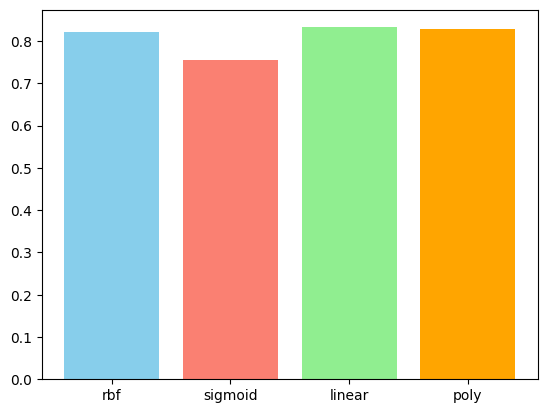

In [41]:
import matplotlib.pyplot as plt
colors = ["skyblue", "salmon", "lightgreen", "orange"]
plt.bar(["rbf","sigmoid","linear","poly"],[test_accuracy_rbf,test_accuracy_sigmoid,test_accuracy_linear,test_accuracy_poly],color = colors)

plt.show